# Central Limit Theorem

The theorem explain that as sample sizes get larger and larger, the sampling distribution of the mean will become normally distributed, even if the data within each sample are not normally distributed. <br>

The Central Limit Theorem is important for statistics because it allows us to safely assume that the sampling distribution of the mean will be normal in most cases. In addition to that, the mean the these sample means will be equal to the population mean and standard error (standard deviation of the sample means) will also decrease with increasing in sample size.

Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load dataset and remove the first two column.

In [2]:
df = pd.read_csv("gapminder.csv")
df = df.iloc[:,2:]
df

,year,population,continent,life_exp,gdp_cap
0,2007,31889923,Asia,43.828,974.580338
1,2007,3600523,Europe,76.423,5937.029526
2,2007,33333216,Africa,72.301,6223.367465
3,2007,12420476,Africa,42.731,4797.231267
4,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...
137,2007,85262356,Asia,74.249,2441.576404
138,2007,4018332,Asia,73.422,3025.349798
139,2007,22211743,Asia,62.698,2280.769906
140,2007,11746035,Africa,42.384,1271.211593


Now we look at the the life expectancy data

In [3]:
df_life_exp = df['life_exp']
df_life_exp.describe()

count    142.000000
mean      67.007423
std       12.073021
min       39.613000
25%       57.160250
50%       71.935500
75%       76.413250
max       82.603000
Name: life_exp, dtype: float64

Let us take out the mean of the life expectancy data.

In [4]:
df_life_exp.mean()

67.00742253521126

Then we plot all the observations in life expectancy data.

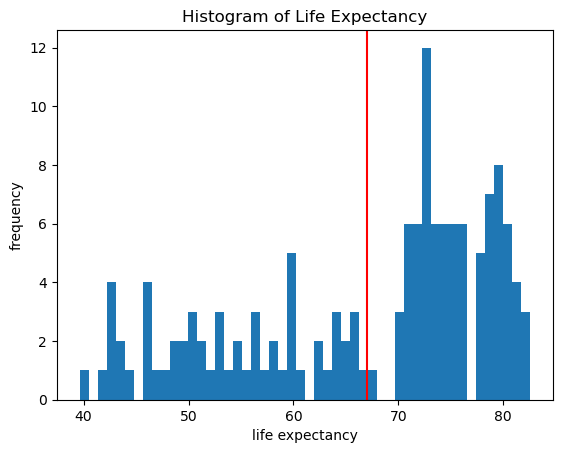

In [5]:
plt.hist(df_life_exp, bins=50)

plt.xlabel('life expectancy')
plt.ylabel('frequency')
plt.title('Histogram of Life Expectancy')
plt.axvline(x=df_life_exp.mean(),color='r')

Interpretation the plot above:<br>
- We can see that the red line in the middle is the mean of data which almost at the centre of main distribution.
- Most of the distribution is normal but the shape of distribution is not 100%. 
- We could assume that the data point around 40 that maybe an outlier.

Since the shape of distribution is not like we want, we need to draw a sufficient samples and compute the sample means and again plot the data to get a normal distribution. 
In this example, we draw 14 sample (around 10% of total population), calculate the sample mean, and plot them.

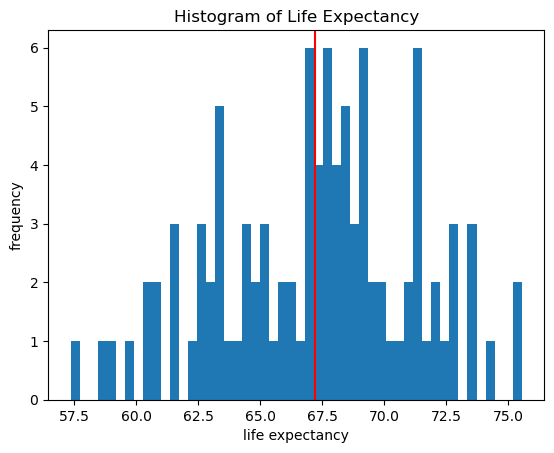

In [6]:
array = []
n = 100
for i in range(1,n):
    array.append(df_life_exp.sample(n=10,replace= True).mean())

plt.hist(array, bins=50)

plt.xlabel('life expectancy')
plt.ylabel('frequency')
plt.title('Histogram of Life Expectancy')
plt.axvline(x=np.mean(array),color='r')

Interpretation the plot above:
- The shape of distribution is better than previous picture.
- Now I would say that the data point around below 62 and above 70 are suspected to be an outlier.

Now we try to increase the sample from 20, 40 and 75 and again plot all the observations using life expectancy data.

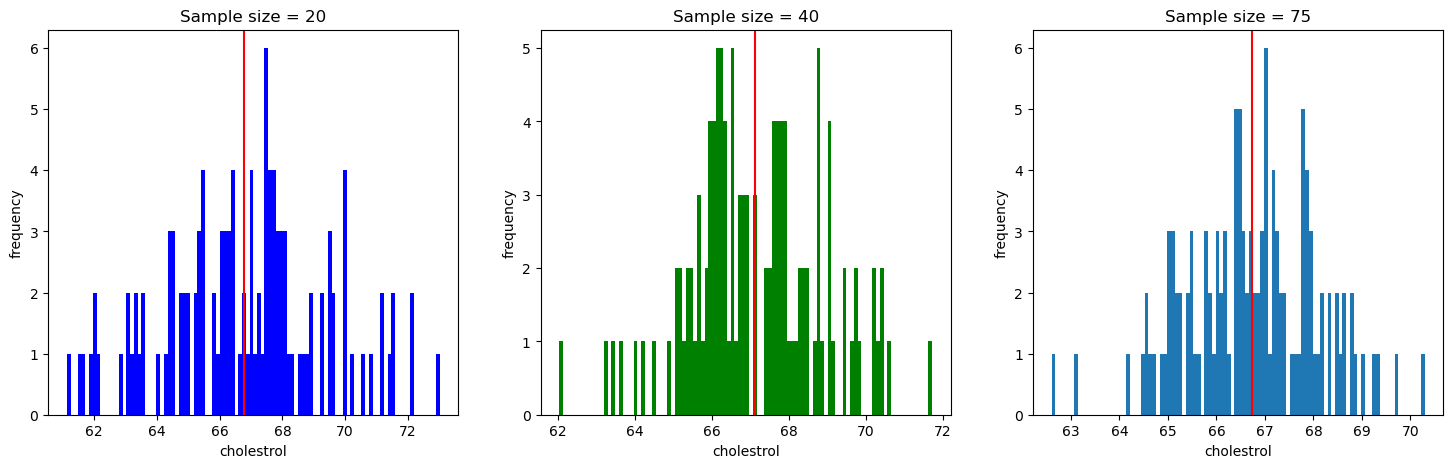

In [7]:
array1 = []
array2 = []
array3 = []
n = 120
for i in range(1,n):
    array1.append(df_life_exp.sample(n=20,replace= True).mean())
    array2.append(df_life_exp.sample(n=40,replace= True).mean())
    array3.append(df_life_exp.sample(n=75,replace= True).mean())

#print(array)
fig , (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18,5))
#plt.figure()

#plt.subplot(311)
ax1.hist(array1, bins=100,color='b')
ax1.set_xlabel('cholestrol')
ax1.set_ylabel('frequency')
ax1.set_title('Sample size = 20')
ax1.axvline(x=np.mean(array1),color='r') 

#ax2.subplot(312)
ax2.hist(array2, bins=100, color='g')
ax2.set_xlabel('cholestrol')
ax2.set_ylabel('frequency')
ax2.set_title('Sample size = 40')
ax2.axvline(x=np.mean(array2),color='r') 

#ax3.subplot(313)
ax3.hist(array3, bins=100)
ax3.set_xlabel('cholestrol')
ax3.set_ylabel('frequency')
ax3.set_title('Sample size = 75')
ax3.axvline(x=np.mean(array3),color='r') 

At the end, we can conclude that:
- We still have outlier in our dataset. If we need to use the data, we have to remove them.
- As the sample size increase, we will see a good shape of sample distribution which approach to normal distribution.

facit
- our dataset is very small